# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.8.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169017344/169001437 [==============================] - 6s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 3200)              0

> ## 2) Model Compile

* 모델 학습방법 설정

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 10분

In [10]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/50
313/313 [==============================] - 20s 32ms/step - loss: 4.2574 - accuracy: 0.0498 - val_loss: 3.8170 - val_accuracy: 0.1180
Epoch 2/50
313/313 [==============================] - 10s 31ms/step - loss: 3.7142 - accuracy: 0.1292 - val_loss: 3.3198 - val_accuracy: 0.2048
Epoch 3/50
313/313 [==============================] - 9s 30ms/step - loss: 3.3903 - accuracy: 0.1834 - val_loss: 3.1582 - val_accuracy: 0.2352
Epoch 4/50
313/313 [==============================] - 10s 31ms/step - loss: 3.1721 - accuracy: 0.2230 - val_loss: 2.9601 - val_accuracy: 0.2734
Epoch 5/50
313/313 [==============================] - 10s 31ms/step - loss: 3.0063 - accuracy: 0.2566 - val_loss: 2.8502 - val_accuracy: 0.2955
Epoch 6/50
313/313 [==============================] - 10s 31ms/step - loss: 2.8700 - accuracy: 0.2765 - val_loss: 2.7284 - val_accuracy: 0.3183
Epoch 7/50
313/313 [==============================] - 10s 31ms/step - loss: 2.7487 - accuracy: 0.3040 - val_loss: 2.7101 - val_accuracy: 

> ## 4) 학습 결과 시각화

* Loss Visualization

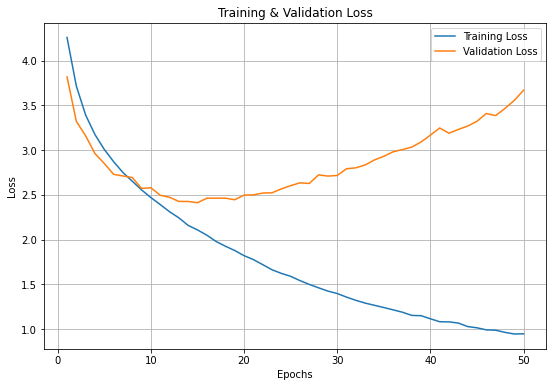

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 3.6375 - accuracy: 0.3754
Loss = 3.63750
Accuracy = 0.37540


# 
# 
# 
# The End
# 
# 
# 